In [43]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [51]:
y_scores = model.predict_proba(X_test)[:,1]


In [53]:
y_scores

array([0.04953671, 0.17458443, 0.09362195, 0.25509183, 0.63549035,
       0.11671289, 0.06567053, 0.42190058, 0.04866019, 0.57563777,
       0.3387467 , 0.41303028, 0.69854497, 0.19964125, 0.02001701,
       0.82469707, 0.8665701 , 0.03101117, 0.25510299, 0.89492591,
       0.95245737, 0.83478349, 0.11740656, 0.44670631, 0.08923245,
       0.06882269, 0.6511726 , 0.41197701, 0.17861164, 0.28689426,
       0.24547827, 0.43902601, 0.00942477, 0.24259569, 0.35169898,
       0.9616446 , 0.34359822, 0.80924448, 0.29380642, 0.05083128,
       0.18184821, 0.08672095, 0.42230002, 0.18738166, 0.03011645,
       0.03949199, 0.24740903, 0.42782912, 0.10529452, 0.379705  ,
       0.99355895, 0.1066725 , 0.39101286, 0.76881866, 0.36866147,
       0.45775508, 0.95035303, 0.41991372, 0.39155848, 0.04376072,
       0.37293582, 0.90128288, 0.88176335, 0.88842705, 0.33083926,
       0.06931308, 0.95264421, 0.20056307, 0.26055444, 0.35463665,
       0.10359033, 0.08168625, 0.45043526, 0.09221281, 0.08648

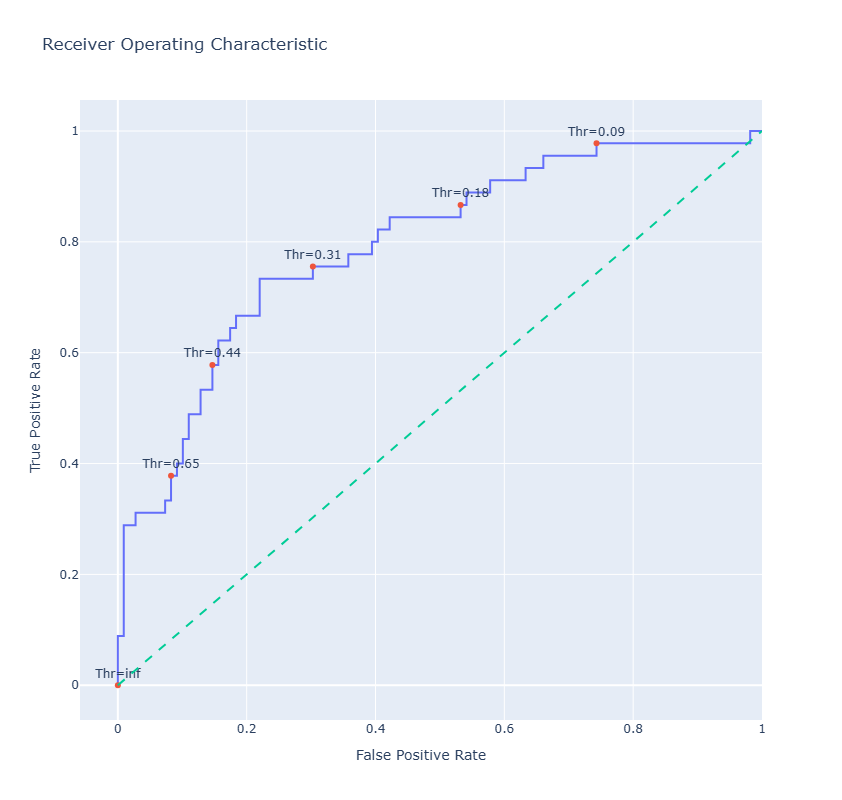

In [55]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [57]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.3686614675208832


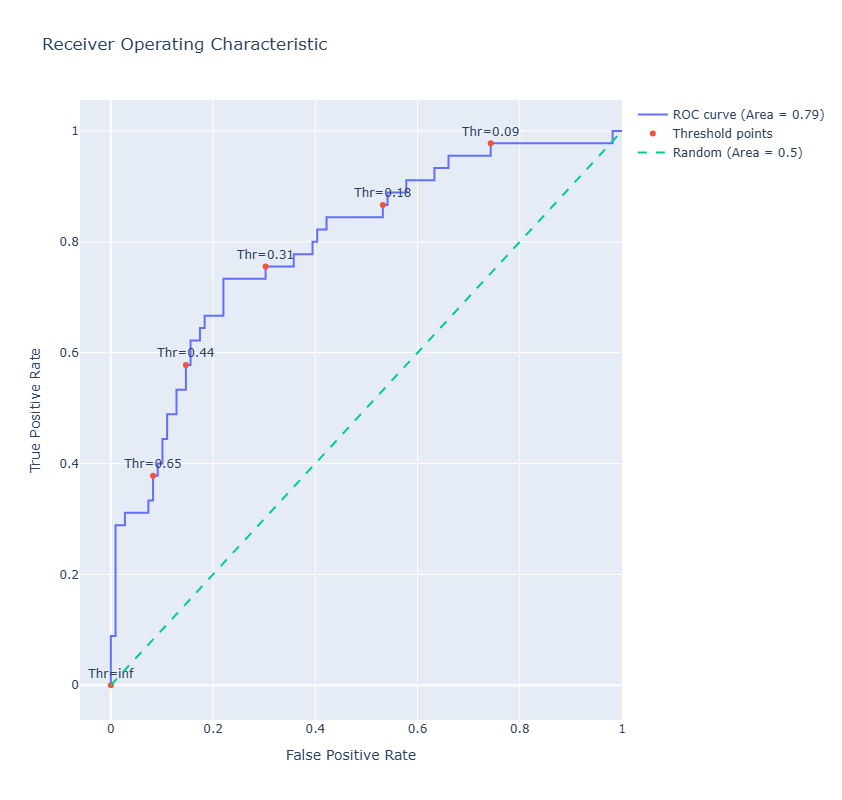

In [59]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


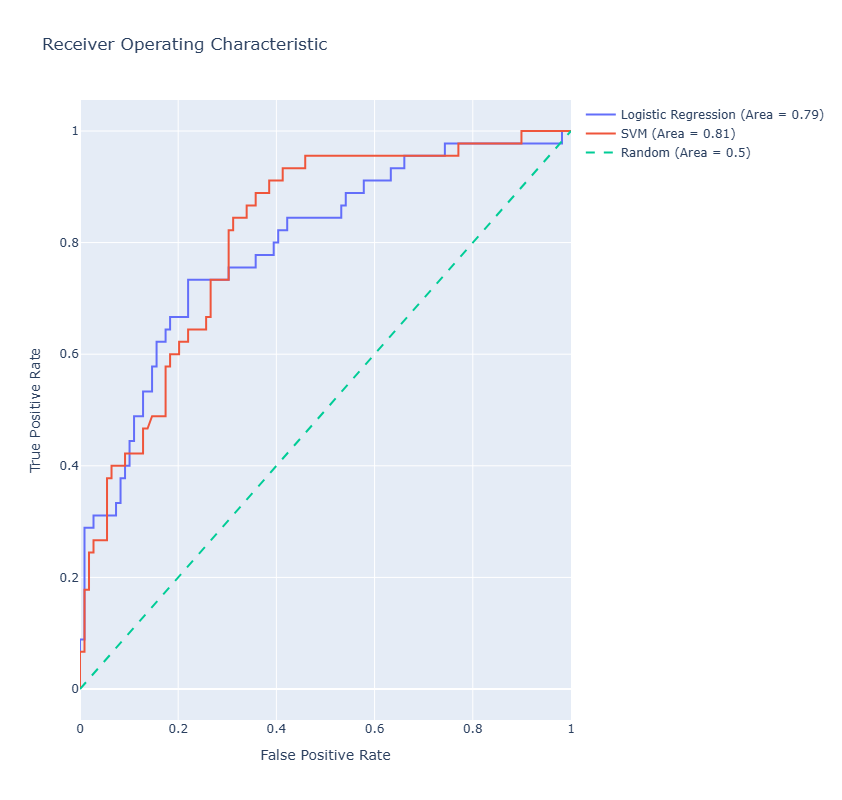

In [61]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# SVM requires feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_scores = svm_model.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()
